# Ali Mubarak
# 09011181823011
# SK5 A Indralaya

# Sedikit Pengenalan Mengenai SVM

Apa itu SVM? Support Vector Machine (SVM) merupakan salah satu metode dalam supervised learning yang biasanya digunakan untuk klasifikasi (seperti Support Vector Classification) dan regresi (Support Vector Regression).

Dalam pemodelan klasifikasi, SVM memiliki konsep yang lebih matang dan lebih jelas secara matematis dibandingkan dengan teknik-teknik klasifikasi lainnya. SVM juga dapat mengatasi masalah klasifikasi dan regresi dengan linear maupun non linear.

SVM digunakan untuk mencari hyperplane terbaik dengan memaksimalkan jarak antar kelas. Hyperplane adalah sebuah fungsi yang dapat digunakan untuk pemisah antar kelas. Dalam 2-D fungsi yang digunakan untuk klasifikasi antar kelas disebut sebagai line whereas, fungsi yang digunakan untuk klasifikasi antas kelas dalam 3-D disebut plane similarly, sedangan fungsi yang digunakan untuk klasifikasi di dalam ruang kelas dimensi yang lebih tinggi di sebut hyperplane.

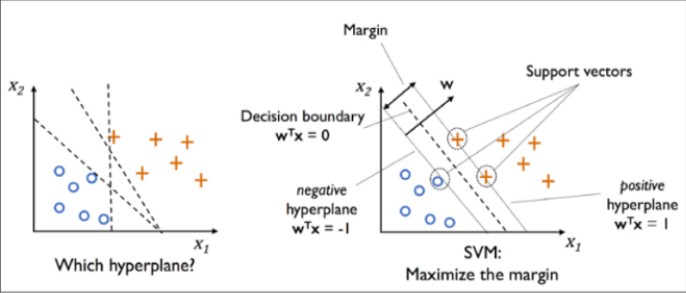

# Source Code

Import Library, read dataset, train testing

<IPython.core.display.Javascript object>


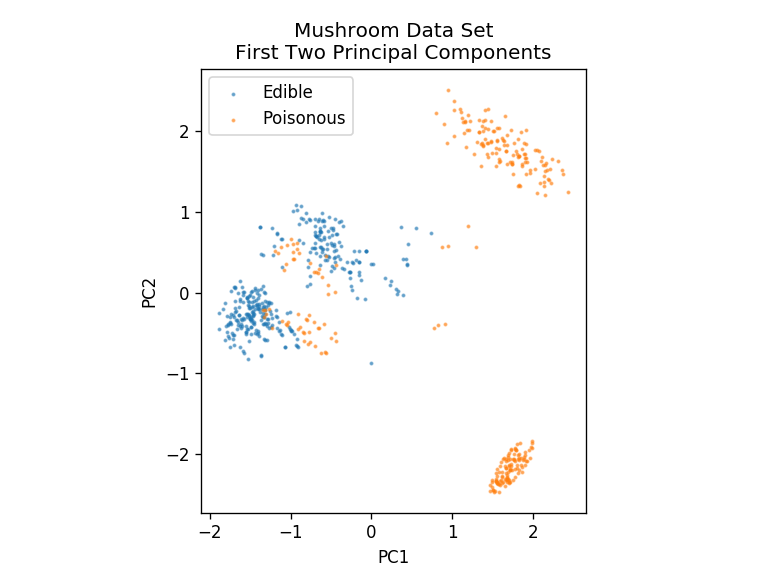

In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

df = pd.read_csv('mushrooms.csv')
df2 = pd.get_dummies(df)

df3 = df2.sample(frac=0.08)

X = df3.iloc[:,2:]
y = df3.iloc[:,1]


pca = PCA(n_components=2).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)


plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='Edible', s=2)
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='Poisonous', s=2)
plt.legend()
plt.title('Mushroom Data Set\nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')

In [3]:
def plot_mushroom_boundary(X, y, fitted_model):

    plt.figure(figsize=(9.8,5), dpi=100)
    
    for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
        plt.subplot(1,2,i+1)

        mesh_step_size = 0.01  # step size in the mesh
        x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
        y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
        if i == 0:
            Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
        else:
            try:
                Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
            except:
                plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                     verticalalignment='center', transform = plt.gca().transAxes, fontsize=12)
                plt.axis('off')
                break
        Z = Z.reshape(xx.shape)
        plt.scatter(X[y.values==0,0], X[y.values==0,1], alpha=0.4, label='Edible', s=5)
        plt.scatter(X[y.values==1,0], X[y.values==1,1], alpha=0.4, label='Posionous', s=5)
        plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
                   extent=(x_min, x_max, y_min, y_max), origin='lower')
        plt.title(plot_type + '\n' + 
                  str(fitted_model).split('(')[0]+ ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
        plt.gca().set_aspect('equal');
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)

Classifier

# Klasifikasi Menggunakan Support Vector Machine (SVM)

Disini, kita menggunakan metode SVM (Support Vector Machine), dimana SVM merupakan salah satu metode klasifikasi dalam data mining. SVM dapat melakukan prediksi baik pada klasifikasi maupun regresi Hyperplane, dapat memaksimalkan jarak atau margin antara kelas data Hyperplane terbaik dapat ditemukan dengan mengukur margin dan kemudian mencari titik maksimalnya Hyperplane (batas keputusan).

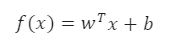

Adapun fungsi yang digunakan untuk melakukan klasifikasi dengan metode SVM, sebagai berikut.

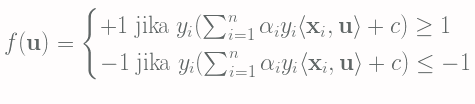

<IPython.core.display.Javascript object>


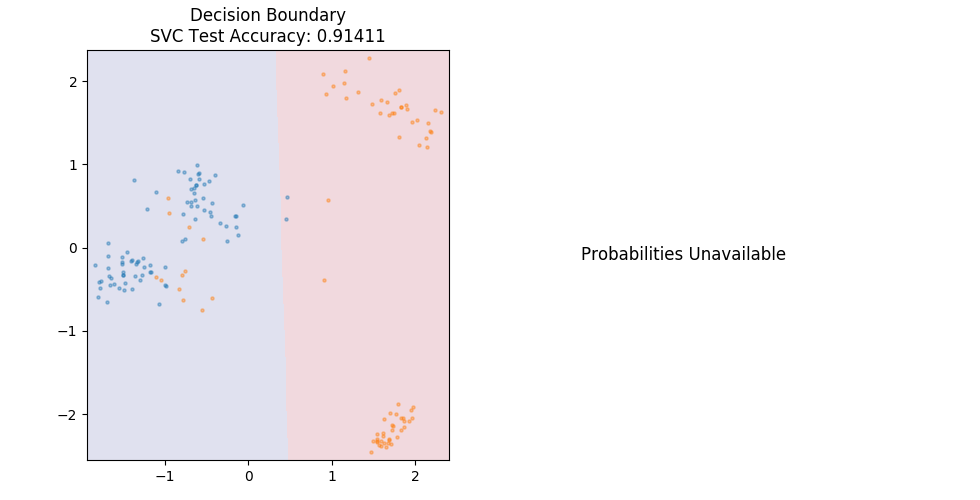

In [8]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

<IPython.core.display.Javascript object>


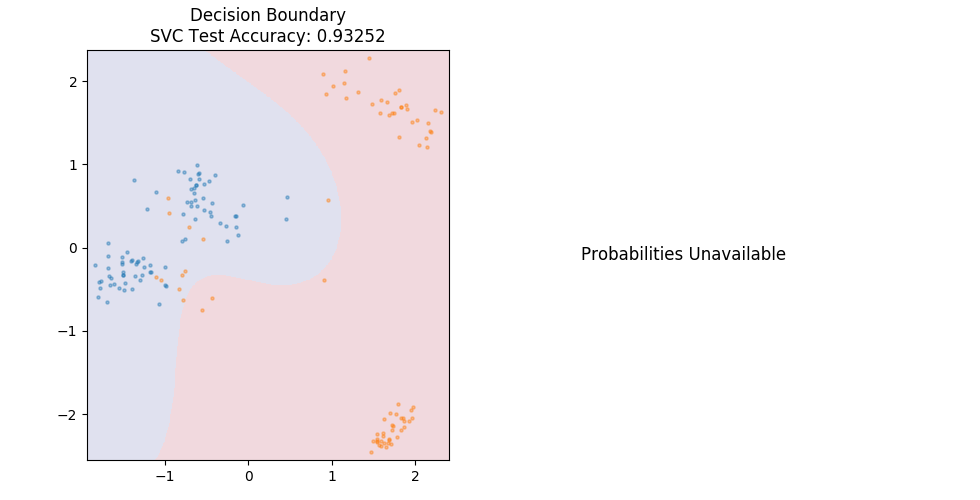

In [9]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=1)
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

<IPython.core.display.Javascript object>


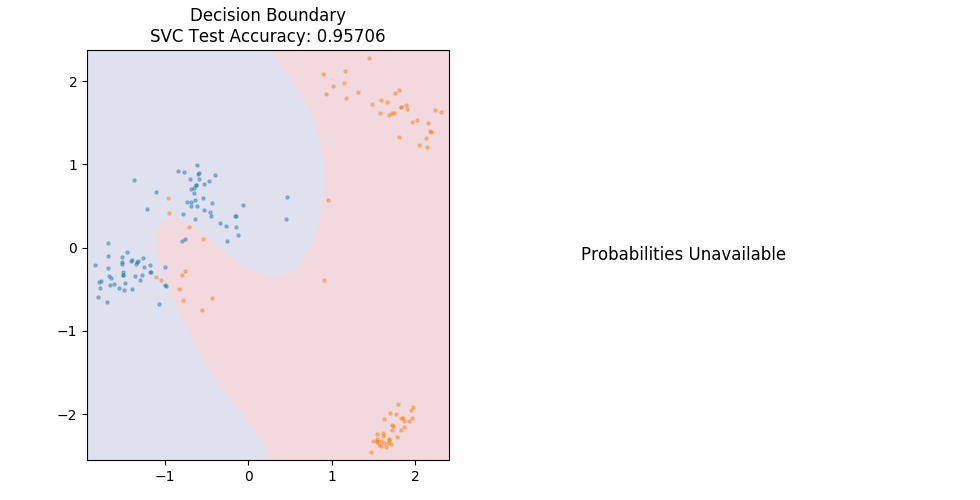

In [10]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=10)
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

<IPython.core.display.Javascript object>


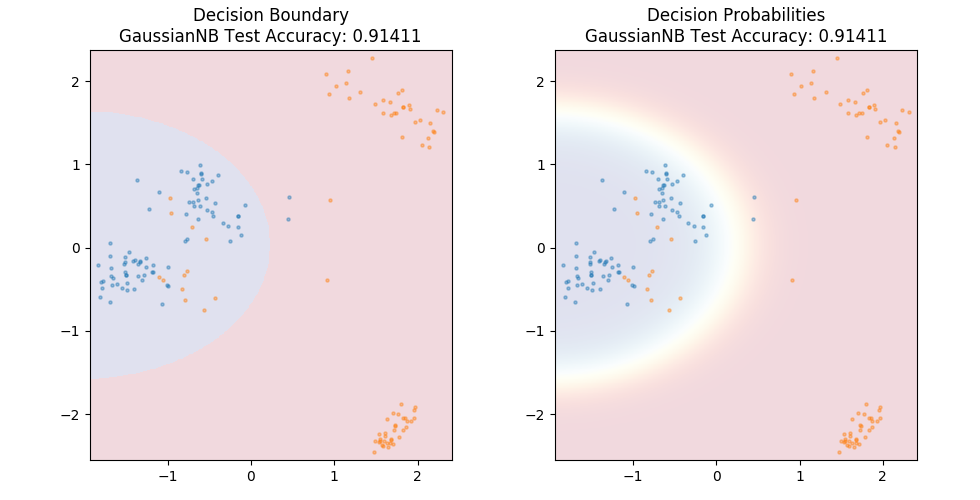

In [11]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)